In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Dateipfad zur CSV-Datei
source_csv = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Clean_Dataset_2.csv'

# CSV-Datei in ein pandas DataFrame einlesen
data = pd.read_csv(source_csv, sep=';')

data_without_id = data.drop(columns=['ID'])

# DataFrame anzeigen
random_samples = data.sample(3)
print(random_samples)


            ID    airline   flight source_city departure_time stops  \
260846  260846    Vistara   UK-802   Bangalore        Evening   one   
205435  205435     Indigo  6E-7185     Chennai        Morning   one   
45792    45792  Air_India   AI-774      Mumbai          Night   one   

       arrival_time destination_city     class             Route  duration  \
260846      Evening          Chennai  Business  BangaloreChennai     21.50   
205435      Evening        Hyderabad   Economy  ChennaiHyderabad      7.92   
45792       Evening            Delhi   Economy       MumbaiDelhi     21.08   

        days_left  price  
260846         41  60396  
205435         35   5147  
45792          16   7413  


In [2]:
datatypes = data.dtypes
print(datatypes)

ID                    int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
Route                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [3]:
# Dateipfad zur CSV-Datei
source_csv = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Clean_Dataset_2.csv'

# CSV-Datei in ein pandas DataFrame einlesen
data = pd.read_csv(source_csv, sep=';')

# Spalte "ID" entfernen
data_without_id = data.drop(columns=['ID'])

# Drei zufällige Datensätze aus dem aktualisierten DataFrame anzeigen
random_samples_without_id = data_without_id.sample(3)
print(random_samples_without_id)

        airline   flight source_city departure_time stops   arrival_time  \
45929   Vistara   UK-873      Mumbai  Early_Morning   one      Afternoon   
52211   Vistara   UK-940      Mumbai        Evening  zero          Night   
149096   Indigo  6E-6172     Kolkata          Night   one  Early_Morning   

       destination_city    class           Route  duration  days_left  price  
45929             Delhi  Economy     MumbaiDelhi      9.33         17   4953  
52211             Delhi  Economy     MumbaiDelhi      2.17         47   2339  
149096          Chennai  Economy  KolkataChennai      6.58         14   6489  


In [4]:
# Statistische Informationen für alle Spalten im aktualisierten DataFrame anzeigen
description = data_without_id.describe()
print(description)

            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


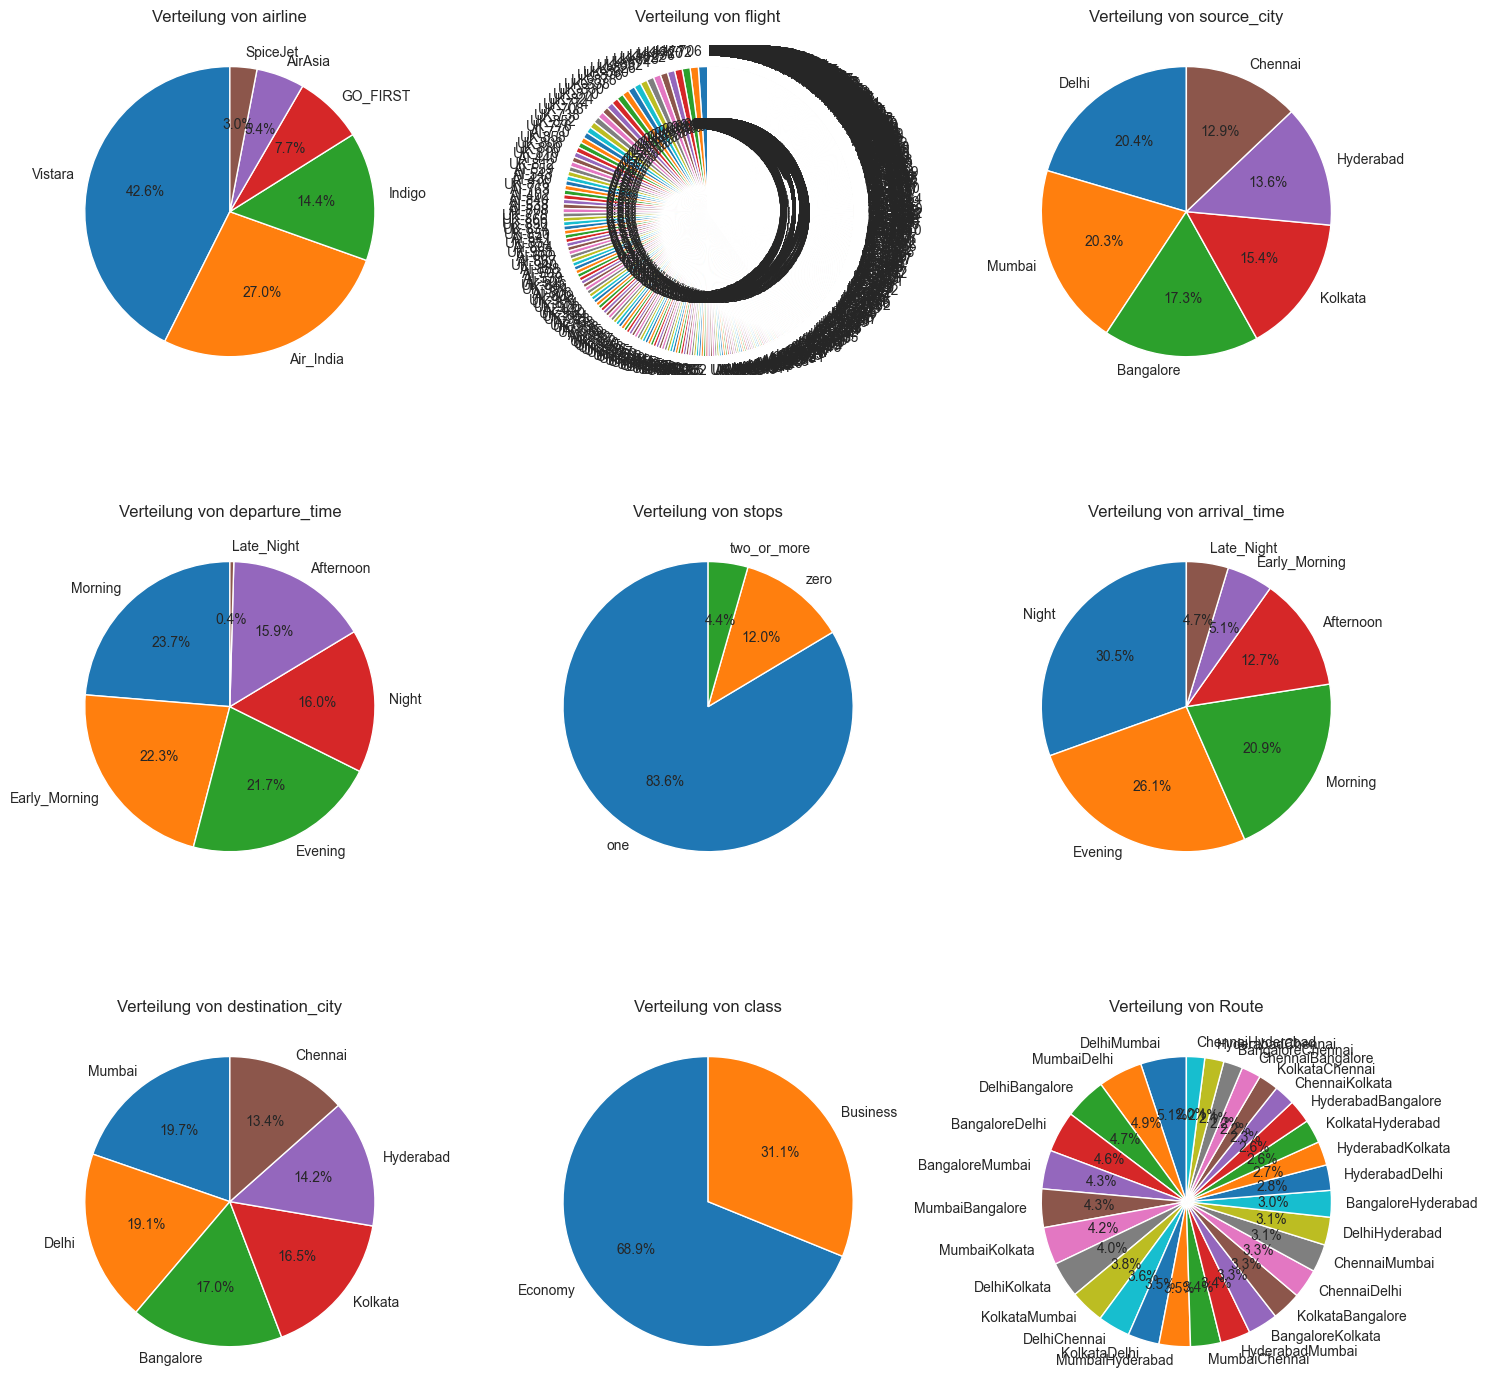

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Annahme: data ist dein DataFrame

categorical_columns = data.select_dtypes(include='object').columns

# Dynamisch die Anzahl der Reihen und Spalten festlegen
num_plots = len(categorical_columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # 3 Subplots pro Reihe

plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # 3 Subplots pro Reihe
    column_counts = data[column].value_counts()
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Verteilung von {column}')

plt.tight_layout()
plt.show()


In [6]:
# Finde den häufigsten Wert für die Variable "flight"
häufigster_flight = data['flight'].mode().iloc[0]

# Gebe den häufigsten Wert aus
print(f'Der häufigste Flug ist: {häufigster_flight}')

Der häufigste Flug ist: UK-706


In [7]:
# Beschreibung der object Variablen
object_variables = data.select_dtypes(include='object').columns

# Erstelle eine Liste, um die Ergebnisse zu sammeln
results_list = []

# Iteriere über die object-Variablen und sammle die Ergebnisse
for variable in object_variables:
    unique_values_count = data[variable].nunique()
    count = data[variable].count()
    most_frequent_value = data[variable].mode().iloc[0]
    most_frequent_value_count = data[variable].value_counts().max()
    
    # Füge die Ergebnisse zur Liste hinzu
    results_list.append({'Variable': variable,
                         'Anzahl einzigartiger Werte': unique_values_count,
                         'Anzahl der Werte': count,
                         'Häufigster Wert': most_frequent_value,
                         'Häufigkeit des häufigsten Werts': most_frequent_value_count})

# Erstelle ein DataFrame aus der Liste
results_df = pd.DataFrame(results_list)

# Gebe das Ergebnis-DataFrame aus
print(results_df)

           Variable  Anzahl einzigartiger Werte  Anzahl der Werte  \
0           airline                           6            300153   
1            flight                        1561            300153   
2       source_city                           6            300153   
3    departure_time                           6            300153   
4             stops                           3            300153   
5      arrival_time                           6            300153   
6  destination_city                           6            300153   
7             class                           2            300153   
8             Route                          30            300153   

  Häufigster Wert  Häufigkeit des häufigsten Werts  
0         Vistara                           127859  
1          UK-706                             3235  
2           Delhi                            61343  
3         Morning                            71146  
4             one                           

In [8]:
# Beschreobung der Variablen
object_variables = data.select_dtypes(include='object').columns

results_list = []

for variable in object_variables:
    unique_values_count = data[variable].nunique()
    count = data[variable].count()
    most_frequent_value = data[variable].mode().iloc[0]
    most_frequent_value_count = data[variable].value_counts().max()
    least_frequent_value = data[variable].value_counts(ascending=True).idxmin()
    least_frequent_value_count = data[variable].value_counts().min()
    
    # Füge die Ergebnisse zur Liste hinzu
    results_list.append({'Variable': variable,
                         'Anzahl einzigartiger Werte': unique_values_count,
                         'Anzahl der Werte': count,
                         'Häufigster Wert': most_frequent_value,
                         'Anzahl des häufigsten Werts': most_frequent_value_count,
                         'Seltenster Wert': least_frequent_value,
                         'Anzahl seltensten Werts': least_frequent_value_count})

results_df = pd.DataFrame(results_list)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+------------------+----------------------------+------------------+-----------------+-----------------------------+------------------+-------------------------+
|     Variable     | Anzahl einzigartiger Werte | Anzahl der Werte | Häufigster Wert | Anzahl des häufigsten Werts | Seltenster Wert  | Anzahl seltensten Werts |
+------------------+----------------------------+------------------+-----------------+-----------------------------+------------------+-------------------------+
|     airline      |             6              |      300153      |     Vistara     |           127859            |     SpiceJet     |          9011           |
|      flight      |            1561            |      300153      |     UK-706      |            3235             |     6E-2914      |            1            |
|   source_city    |             6              |      300153      |      Delhi      |            61343            |     Chennai      |          38700          |
|  departure_time  |        

In [9]:
# Entferne die Spalte "ID"
data_without_id = data.drop(columns=['ID'])

# Anzeige der Anzahl der fehlenden Werte pro Spalte (ohne "ID")
missing_values = data_without_id.isnull().sum()

# Drucke die Ergebnisse
print("Fehlende Werte pro Spalte:")
print(missing_values)

Fehlende Werte pro Spalte:
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
Route               0
duration            0
days_left           0
price               0
dtype: int64


In [10]:
import pandas as pd
from tabulate import tabulate

# Annahme: data ist dein DataFrame

# Wähle die numerischen Variablen (ohne ID), für die du Ausreißer identifizieren möchtest
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
numerical_variables = numerical_variables.drop('ID', errors='ignore')  # Ausschließen der ID-Spalte

# Erstelle eine Liste für die Ausreißer
all_outliers = []

for variable in numerical_variables:
    # Identifiziere Ausreißer mit der IQR-Methode
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[variable] < Q1 - 1.5 * IQR) | (data[variable] > Q3 + 1.5 * IQR)]
    
    # Füge die Ausreißer zur Liste hinzu
    all_outliers.append(outliers)

# Concateniere die DataFrames in der Liste
outliers_df = pd.concat(all_outliers, ignore_index=True)
print(tabulate(outliers_df, headers='keys', tablefmt='pretty', showindex=False))


+--------+-----------+---------+-------------+----------------+-------------+---------------+------------------+----------+--------------------+----------+-----------+--------+
|   ID   |  airline  | flight  | source_city | departure_time |    stops    | arrival_time  | destination_city |  class   |       Route        | duration | days_left | price  |
+--------+-----------+---------+-------------+----------------+-------------+---------------+------------------+----------+--------------------+----------+-----------+--------+
| 10534  |  Vistara  | UK-706  |    Delhi    |   Afternoon    | two_or_more |     Night     |    Bangalore     | Economy  |   DelhiBangalore   |  31.25   |     4     | 12222  |
| 10535  |  Vistara  | UK-706  |    Delhi    |   Afternoon    | two_or_more |     Night     |    Bangalore     | Economy  |   DelhiBangalore   |  33.17   |     4     | 12222  |
| 10540  | Air_India | AI-9887 |    Delhi    | Early_Morning  | two_or_more |    Evening    |    Bangalore     | Ec

In [11]:
import pandas as pd
from tabulate import tabulate

# Annahme: data ist dein DataFrame

# Wähle die numerischen Variablen (ohne ID), für die du Ausreißer identifizieren möchtest
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
numerical_variables = numerical_variables.drop('ID', errors='ignore')  # Ausschließen der ID-Spalte

# Erstelle eine Liste für die Ausreißer
all_outliers = []

for variable in numerical_variables:
    # Identifiziere Ausreißer mit der IQR-Methode
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[variable] < Q1 - 1.5 * IQR) | (data[variable] > Q3 + 1.5 * IQR)]
    
    # Füge eine Spalte mit dem Variablennamen hinzu
    outliers['Variable'] = variable
    
    # Füge die Ausreißer zur Liste hinzu
    all_outliers.append(outliers)

# Concateniere die DataFrames in der Liste
outliers_df = pd.concat(all_outliers, ignore_index=True)
print(tabulate(outliers_df, headers='keys', tablefmt='pretty', showindex=False))


C:\Users\g065308\AppData\Local\Temp\ipykernel_10952\747866032.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Variable'] = variable
C:\Users\g065308\AppData\Local\Temp\ipykernel_10952\747866032.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Variable'] = variable


+--------+-----------+---------+-------------+----------------+-------------+---------------+------------------+----------+--------------------+----------+-----------+--------+----------+
|   ID   |  airline  | flight  | source_city | departure_time |    stops    | arrival_time  | destination_city |  class   |       Route        | duration | days_left | price  | Variable |
+--------+-----------+---------+-------------+----------------+-------------+---------------+------------------+----------+--------------------+----------+-----------+--------+----------+
| 10534  |  Vistara  | UK-706  |    Delhi    |   Afternoon    | two_or_more |     Night     |    Bangalore     | Economy  |   DelhiBangalore   |  31.25   |     4     | 12222  | duration |
| 10535  |  Vistara  | UK-706  |    Delhi    |   Afternoon    | two_or_more |     Night     |    Bangalore     | Economy  |   DelhiBangalore   |  33.17   |     4     | 12222  | duration |
| 10540  | Air_India | AI-9887 |    Delhi    | Early_Morning

In [12]:
# Speichere das DataFrame mit Ausreißern in eine CSV-Datei am angegebenen Speicherort
speicherort = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\ausreisser.csv'
outliers_df.to_csv(speicherort, index=False)

In [13]:
import pandas as pd

# Annahme: data ist dein DataFrame
# Annahme: 'price' ist die Variable, für die du Ausreißer identifizieren möchtest

# Identifiziere Ausreißer mit der IQR-Methode für die Variable 'price'
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
outliers_price = data[(data['price'] < Q1 - 1.5 * IQR) | (data['price'] > Q3 + 1.5 * IQR)]

# Gib das DataFrame mit den Ausreißern aus
print(outliers_price)


            ID  airline  flight source_city departure_time        stops  \
215858  215858  Vistara  UK-809       Delhi        Evening  two_or_more   
215859  215859  Vistara  UK-809       Delhi        Evening  two_or_more   
216025  216025  Vistara  UK-817       Delhi        Evening  two_or_more   
216094  216094  Vistara  UK-995       Delhi        Morning          one   
216095  216095  Vistara  UK-963       Delhi        Morning          one   
...        ...      ...     ...         ...            ...          ...   
293474  293474  Vistara  UK-836     Chennai        Morning          one   
296001  296001  Vistara  UK-838     Chennai          Night          one   
296081  296081  Vistara  UK-832     Chennai  Early_Morning          one   
296170  296170  Vistara  UK-838     Chennai          Night          one   
296404  296404  Vistara  UK-838     Chennai          Night          one   

       arrival_time destination_city     class             Route  duration  \
215858      Evening  

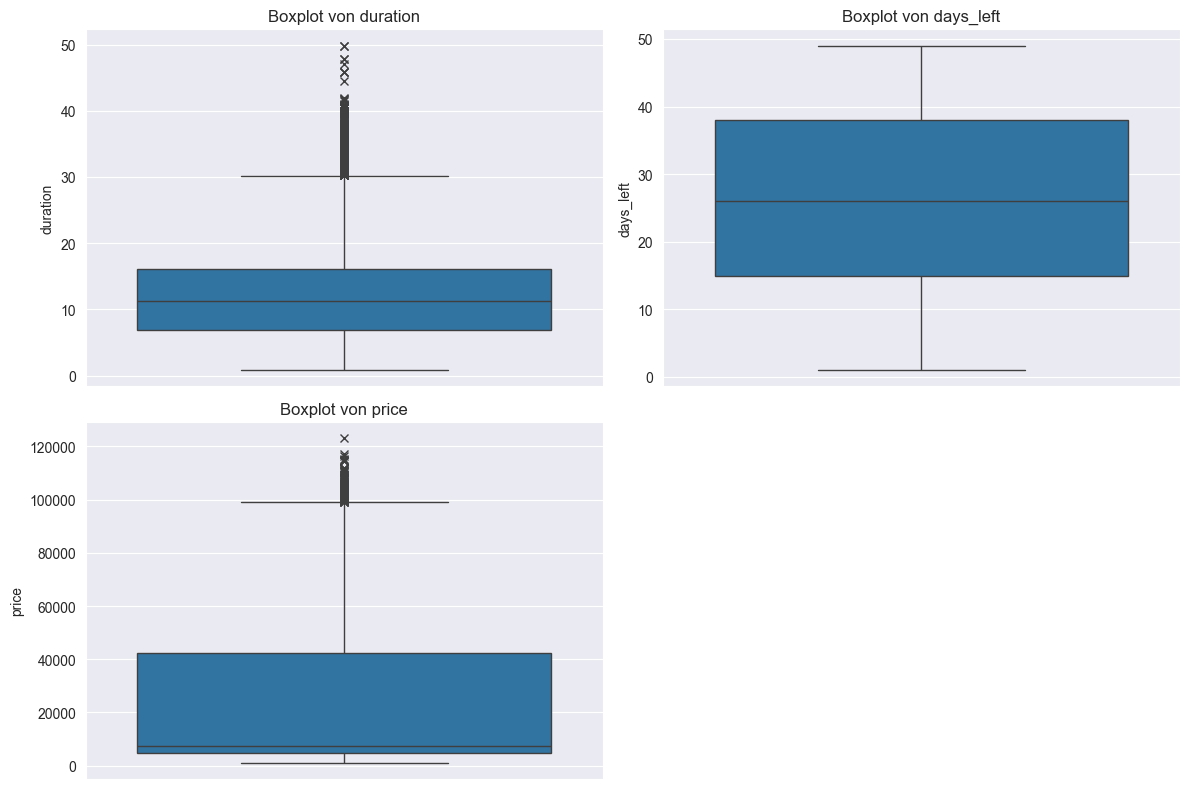

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: data ist dein DataFrame

# Wähle die numerischen Variablen (ohne ID), für die du Boxplots erstellen möchtest
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
numerical_variables = numerical_variables.drop('ID', errors='ignore')  # Ausschließen der ID-Spalte

# Erstelle Boxplots für jede numerische Variable und hebe Ausreißer hervor
plt.figure(figsize=(12, 8))

for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=variable, data=data, orient='v', flierprops=dict(marker='x'))
    plt.title(f'Boxplot von {variable}')

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from scipy.stats import zscore

# Annahme: data ist dein DataFrame

# Wähle die numerischen Variablen (ohne ID), für die du Ausreißer identifizieren möchtest
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
numerical_variables = numerical_variables.drop('ID', errors='ignore')  # Ausschließen der ID-Spalte

# Berechne Z-Scores für jede numerische Variable
z_scores = zscore(data[numerical_variables])

# Setze einen Schwellenwert für den Z-Score (z.B. 3)
threshold = 3

# Identifiziere Ausreißer
outliers = data[(abs(z_scores) > threshold).any(axis=1)]

# Füge eine Spalte 'Verantwortliche Variable' hinzu, um die Variable für die Ausreißer zu kennzeichnen
outliers['Verantwortliche Variable'] = outliers.apply(lambda row: ', '.join(numerical_variables[abs(row[numerical_variables]) > threshold].tolist()), axis=1)

# Speichere Ausreißer in einer CSV-Datei
outliers.to_csv(r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Ausreißer_Z_score.csv', index=False)


C:\Users\g065308\AppData\Local\Temp\ipykernel_10952\4281092731.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Verantwortliche Variable'] = outliers.apply(lambda row: ', '.join(numerical_variables[abs(row[numerical_variables]) > threshold].tolist()), axis=1)


In [16]:
import pandas as pd

# Annahme: Laden Sie die Dateien Ausreißer_Z_score.csv und ausreisser.csv aus den genannten Verzeichnissen

# Lade die beiden Dateien in DataFrames
file1_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Ausreißer_Z_score.csv'
file2_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\ausreisser.csv'

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Verwende die Spalte 'ID' für den Vergleich
column_name = 'ID'

# Vergleiche die Spalte in beiden DataFrames und speichere Überschneidungen in einer neuen Datei
overlap_df = pd.merge(df1, df2, how='inner', on=column_name)
overlap_file_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Überschneidungen.csv'
overlap_df.to_csv(overlap_file_path, index=False)

print("Überschneidungen wurden in der Datei 'Überschneidungen.csv' gespeichert.")



Überschneidungen wurden in der Datei 'Überschneidungen.csv' gespeichert.


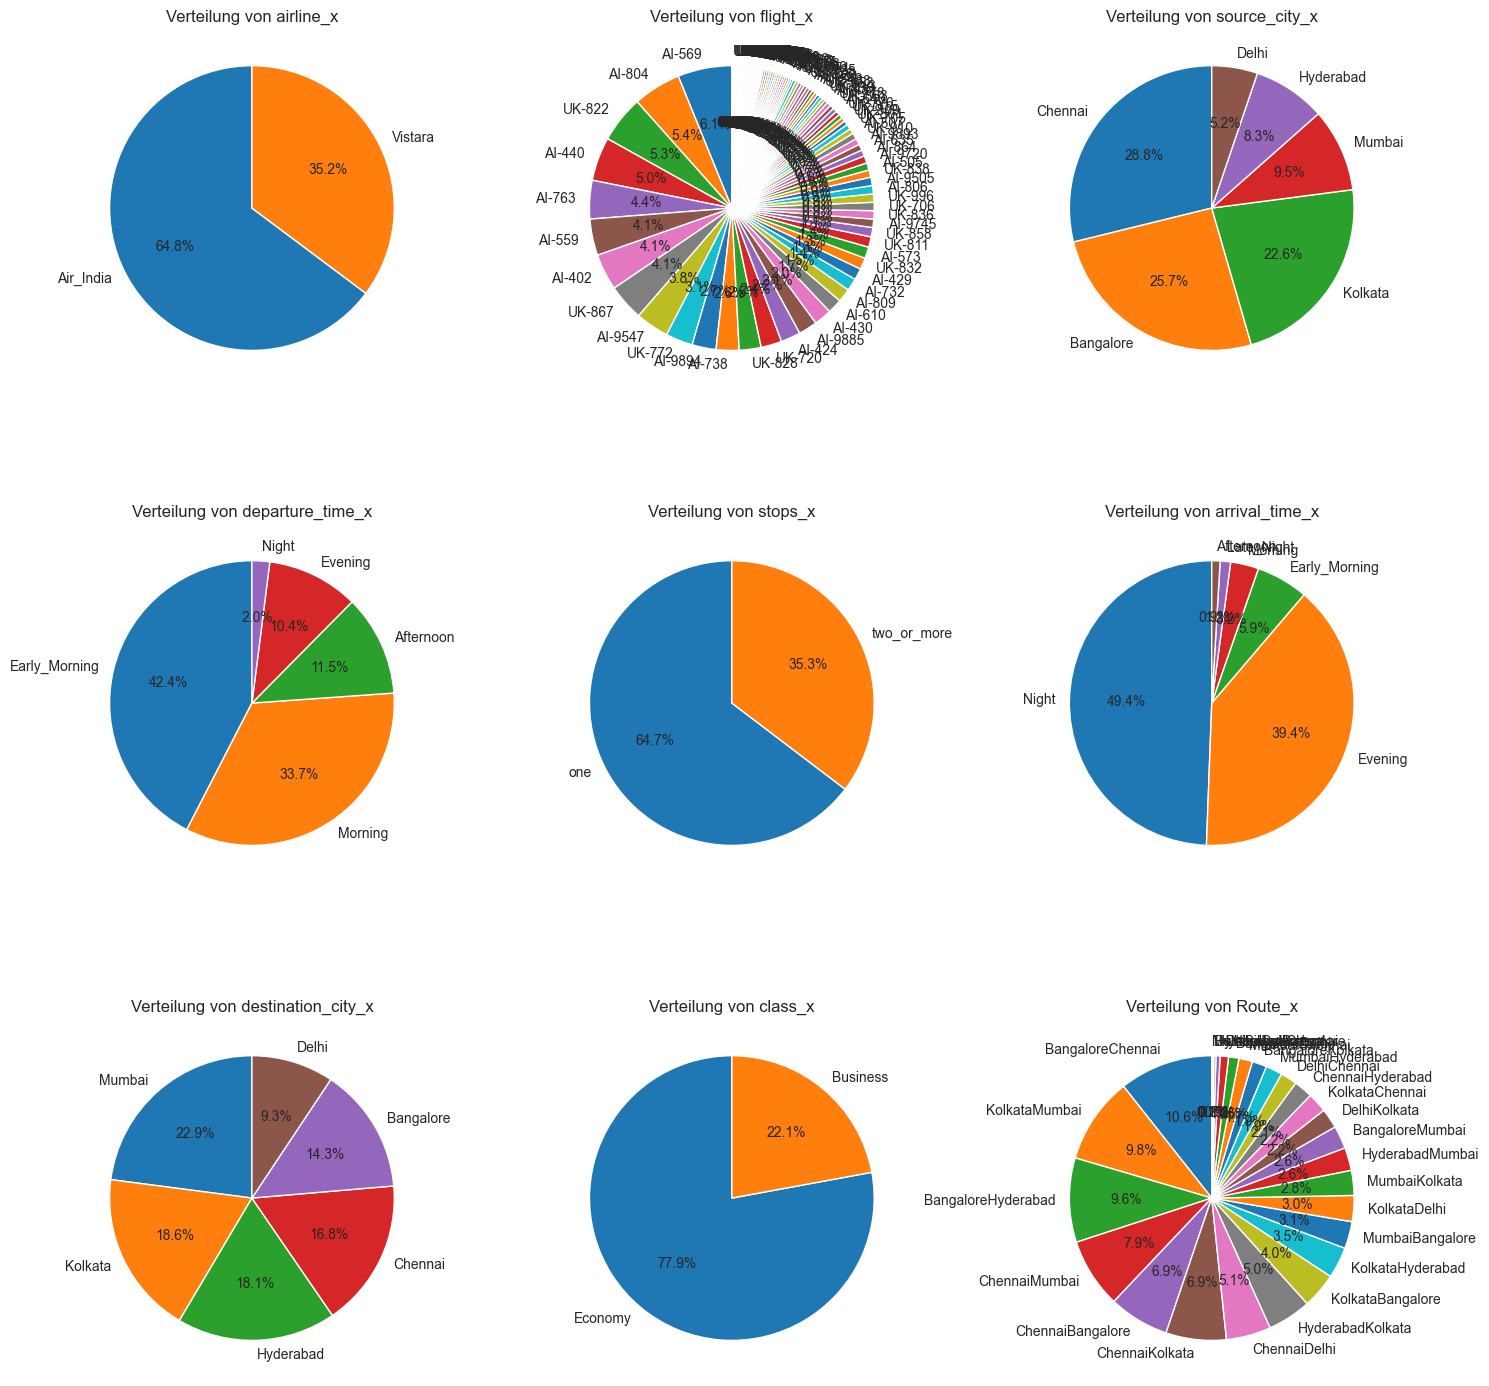

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Dateipfad zur Datei 'Überschneidungen.csv'
file_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Überschneidungen.csv'

# Datei einlesen
overlap_data = pd.read_csv(file_path)

# Filtern von object-Variablen, die mit "x" enden
x_ending_object_variables = overlap_data.select_dtypes(include='object').filter(like='x')

# Dynamisch die Anzahl der Reihen und Spalten festlegen
num_plots = len(x_ending_object_variables.columns)
num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # 3 Subplots pro Reihe

plt.figure(figsize=(15, 5 * num_rows))
for i, variable in enumerate(x_ending_object_variables.columns, 1):
    plt.subplot(num_rows, 3, i)  # 3 Subplots pro Reihe
    variable_counts = x_ending_object_variables[variable].value_counts()
    plt.pie(variable_counts, labels=variable_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Verteilung von {variable}')

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Lade die Dateien in DataFrames mit Semikolon als Trennzeichen
clean_dataset_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Clean_Dataset_2.csv'
overlaps_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\Überschneidungen.csv'

clean_dataset = pd.read_csv(clean_dataset_path, delimiter=';')
overlaps = pd.read_csv(overlaps_path, delimiter=',')

# Verwende die Spalte 'ID' für den Vergleich
column_name = 'ID'

# Überprüfe, ob die Spalte 'ID' in den DataFrames vorhanden ist
if column_name in clean_dataset.columns and column_name in overlaps.columns:
    # Filtere IDs in Clean_Dataset_2, die auch in Überschneidungen vorhanden sind
    clean_dataset_without_anomalies = clean_dataset[~clean_dataset[column_name].isin(overlaps[column_name])]

    # Speichere die bereinigten Daten und überschreibe die Datei, falls vorhanden
    clean_dataset_without_anomalies_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\clean_dataset_without_anomalies.csv'
    clean_dataset_without_anomalies.to_csv(clean_dataset_without_anomalies_path, index=False, mode='w')

    # Speichere die Überschneidungen in einem separaten DataFrame und als CSV
    overlaps_df = clean_dataset[clean_dataset[column_name].isin(overlaps[column_name])]
    overlaps_csv_path = r'C:\Users\g065308\Drive Merkur.works\Masterstudium\Qualitätssicherung und Erklärbarkeit in der Datenwissenschaft\Data\Flight Price Prediction\overlaps.csv'
    overlaps_df.to_csv(overlaps_csv_path, index=False, mode='w')

    print("IDs aus Clean_Dataset_2, die auch in Überschneidungen vorhanden sind, wurden entfernt.")
    print("Bereinigte Daten wurden in 'clean_dataset_without_anomalies.csv' gespeichert.")
    print("Überschneidungen wurden in 'overlaps.csv' gespeichert.")
else:
    print("Die Spalte 'ID' ist in einem der DataFrames nicht vorhanden.")


IDs aus Clean_Dataset_2, die auch in Überschneidungen vorhanden sind, wurden entfernt.
Bereinigte Daten wurden in 'clean_dataset_without_anomalies.csv' gespeichert.
Überschneidungen wurden in 'overlaps.csv' gespeichert.


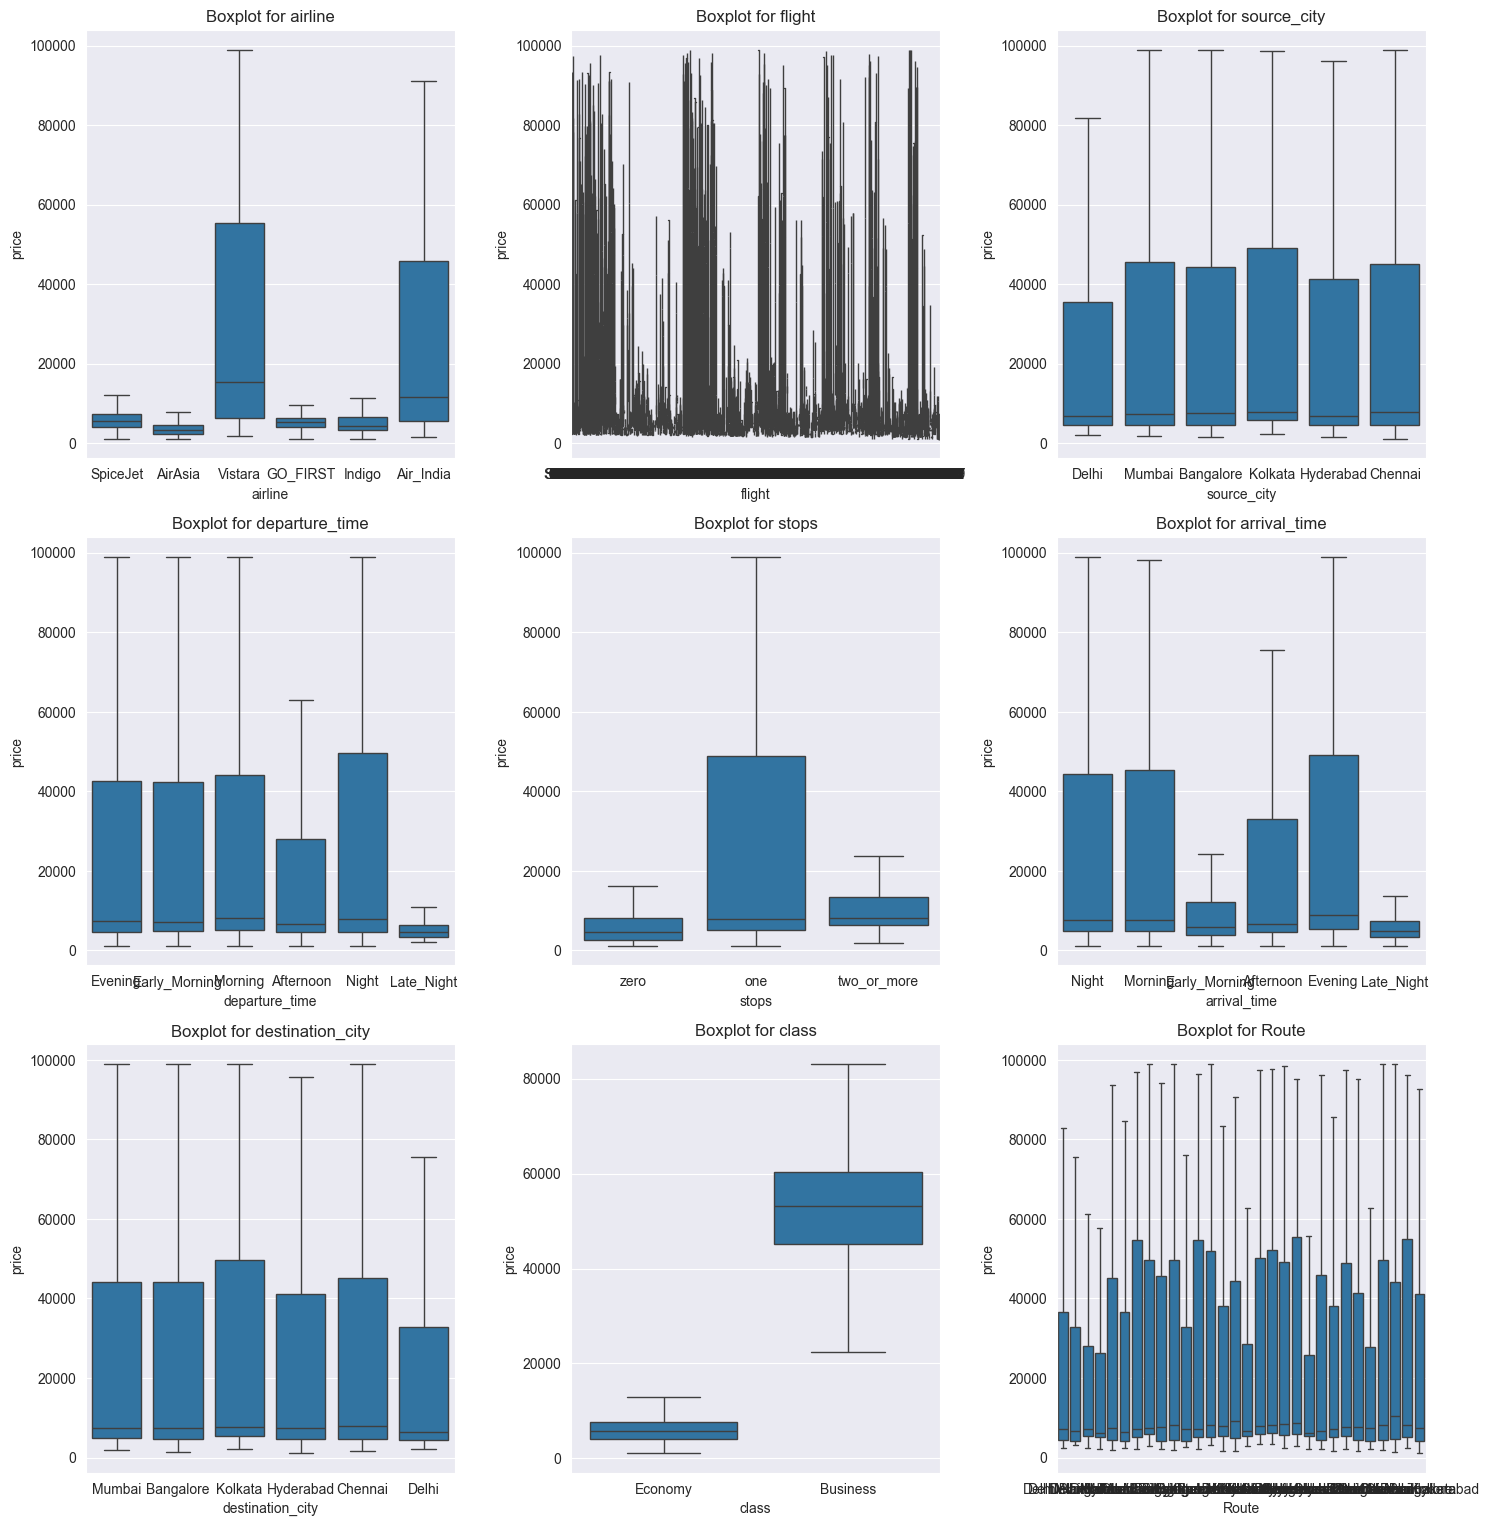

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wähle nur object-Variablen aus dem DataFrame aus
object_columns = clean_dataset_without_anomalies.select_dtypes(include='object').columns

# Berechne die Anzahl der benötigten Subplots basierend auf der Anzahl der object-Variablen
num_subplots = len(object_columns)

# Erstelle Subplots für jeden Boxplot
plt.figure(figsize=(15, 5 * (num_subplots // 3 + 1)))  # Dynamisch die Höhe anpassen
for i, column in enumerate(object_columns, 1):
    plt.subplot((num_subplots // 3) + 1, 3, i)
    sns.boxplot(x=clean_dataset_without_anomalies[column], y=clean_dataset_without_anomalies['price'], showfliers=False)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


In [22]:
# Leere die DataFrames
del results_df
del outliers_df
del df1
del df2

# Rufe den Garbage Collector auf
import gc
gc.collect()


523

In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Wähle die kategorialen Variablen aus dem DataFrame aus
categorical_columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Erstelle eine Kopie des DataFrame, um Änderungen vorzunehmen
df_encoded = clean_dataset_without_anomalies.copy()

# Erstelle einen LabelEncoder
label_encoder = LabelEncoder()

# Verwende Label Encoding für jede kategoriale Spalte
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Zeige die transformierten Daten an
print(df_encoded.head())

# Erstelle ein neues DataFrame mit den transformierten Variablen
transformed_variables = pd.DataFrame()

# Füge die transformierten kategorialen Variablen hinzu
for column in categorical_columns:
    transformed_variables[column] = label_encoder.fit_transform(clean_dataset_without_anomalies[column])

# Füge die nicht kategorialen Variablen hinzu
for column in integer_columns:
    transformed_variables[column] = clean_dataset_without_anomalies[column]

# Zeige die transformierten Daten an
print(transformed_variables.head())


   ID  airline  flight  source_city  departure_time  stops  arrival_time  \
0   0        4    1408            2               2      2             5   
1   1        4    1387            2               1      2             4   
2   2        0    1213            2               1      2             1   
3   3        5    1559            2               4      2             0   
4   4        5    1549            2               4      2             4   

   destination_city  class        Route  duration  days_left  price  
0                 5      1  DelhiMumbai      2.17          1   5953  
1                 5      1  DelhiMumbai      2.33          1   5953  
2                 5      1  DelhiMumbai      2.17          1   5956  
3                 5      1  DelhiMumbai      2.25          1   5955  
4                 5      1  DelhiMumbai      2.33          1   5955  


NameError: name 'integer_columns' is not defined

In [24]:
from tabulate import tabulate

# Konvertiere DataFrame in Liste von dicts
list_of_dicts = clean_dataset_without_anomalies.to_dict(orient='records')

# Gib die Tabelle aus
print(tabulate(list_of_dicts, headers='keys', tablefmt='pretty', showindex=False))


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

